# Determine Phase Tortuosity

This notebook computes tortuosity (including axial values)

**Usage**: In the file menu, click on *Run>Run All Cells*. Then, enter input as prompted

**output**: 
    - overall tortuosity values (tau) 
    - axial tortuosity values (0: throuh-plane, 1:top to bottom, 2:left to right)
    
**Note**: examine the plot and increase number of workers until lines are straight

Enter the containing folder of the image (full path): ../sample-files
Enter the file name (including extension, e.g 'image.tiff'): small-sample-rois-1.tif
Enter the value of the pore phase pixels:  0


TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


##############################
Square Displacement:
Tau: 1.723, R^2: 0.999
Axis 0 Square Displacement Data:
Tau: 2.392, R^2: 0.994
Axis 1 Square Displacement Data:
Tau: 1.433, R^2: 1.0
Axis 2 Square Displacement Data:
Tau: 1.6, R^2: 1.0


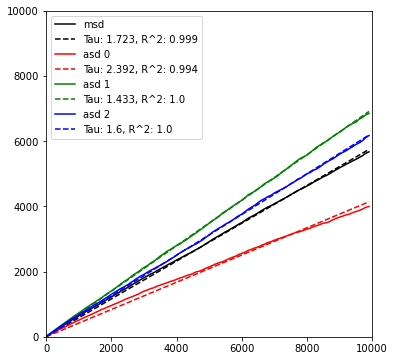

In [26]:
import pytrax as pt
from skimage.io import imread
import imaging as ig
import os
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline



f_dir = str(input('Enter the containing folder of the image (full path):'))
fname = str(input("Enter the file name (including extension, e.g 'image.tiff'):"))
pore_phase_val = int(input('Enter the value of the pore phase pixels: '))
n_walkers = int(input('Enter number of workers (use 10000 for a default) : '))
n_steps = int(input('Enter number of steps (use 10000 for a default) : '))

# f_dir = r"../sample-files"
# fname = 'small-sample-rois-1.tif'

im_path = os.path.join(f_dir, fname)
im = imread(im_path)
im = ig.select_tools.select_phase(im, phase_val=pore_phase_val)

rw = pt.RandomWalk(image=im, seed=False)
rw.run(nt=n_steps, nw=n_walkers, same_start=False, stride=100, num_proc=10)
rw.plot_msd()